# Hierarchical Clustering

Hierarchical clustering is a type of clustering technique used in machine learning that creates a hierarchy of clusters. It's an alternative to methods like K-Means, and although the final result might look similar, the approach differs significantly.

### Types of Hierarchical Clustering
There are two main types of hierarchical clustering:
1. **Agglomerative (Bottom-Up):** In this method, each data point starts as its own cluster. These individual clusters are then merged step by step, based on their proximity, until only one cluster remains.
2. **Divisive (Top-Down):** In contrast, the divisive approach begins with one large cluster containing all data points and then splits it recursively until each point is its own cluster.

In most cases, agglomerative clustering is used, and we’ll focus on that here.

### How Agglomerative Hierarchical Clustering Works

**Step-by-Step Process:**
1. **Start with each data point as its own cluster**: Initially, each data point is treated as an individual cluster. -> That forms N clusters.
2. **Find the closest pair of clusters**: The two closest data points or clusters are combined into one cluster. This reduces the total number of clusters by one. -> That forms N-1 clusters.
3. **Repeat**: Continue merging the closest clusters until all points belong to a single large cluster.

This process builds a hierarchy, where the smallest clusters are nested inside larger clusters. But how do we measure the "closeness" of clusters?

### Measuring Distances Between Clusters
There are several options to define the distance between clusters:
- **Single linkage**: Measure the distance between the closest points in two clusters.
- **Complete linkage**: Measure the distance between the farthest points in two clusters.
- **Average linkage**: Take the average of all distances between points in two clusters.
- **Centroid linkage**: Measure the distance between the centroids (average position) of two clusters.

The choice of distance measurement can affect the final result, so it’s important to pick the one that best suits your problem. Based on your particular situation or business problem, we have to define the best approach needed in your algorithm.

### Dendrogram
Once the hierarchical clustering process is complete, the results are often visualized using a dendrogram. A dendrogram is a visual representation used in hierarchical clustering to illustrate the arrangement of clusters and the process of clustering. It essentially records the memory of the hierarchical clustering algorithm, showing how data points are combined into clusters step by step.

By cutting the dendrogram at a specific level, you can choose the number of clusters you want to identify.


Here’s a breakdown of how a dendrogram works:

1. **Data Points as Initial Clusters**: At the beginning of the hierarchical clustering process, each data point is treated as an individual cluster. The dendrogram reflects this by placing all the data points (or clusters) along the bottom of the chart.

2. **Combining Closest Clusters**: The hierarchical clustering algorithm finds the two closest clusters based on a distance metric, such as Euclidean distance. These two clusters are combined into a single cluster, and this is shown in the dendrogram by a horizontal line connecting the two clusters. The height of the horizontal line represents the distance (or dissimilarity) between the two clusters—closer clusters are connected by lines placed lower on the diagram.


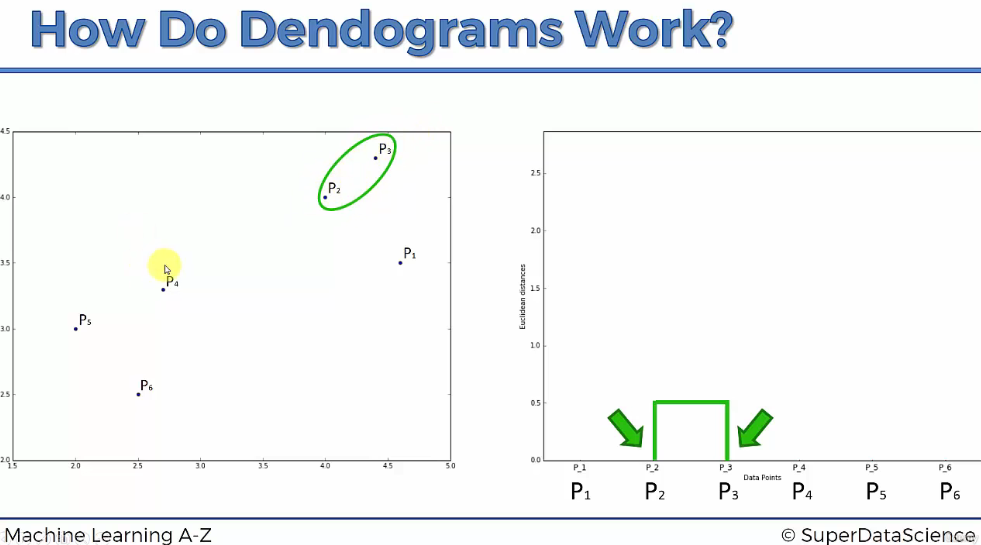


3. **Continuing the Clustering Process**: The algorithm continues by finding the next closest clusters, merging them, and recording the merge on the dendrogram. Each time two clusters are merged, a new horizontal line is drawn, and the height of the line represents the distance between the clusters at the point they were merged. The algorithm repeats this process until all data points are merged into a single large cluster.


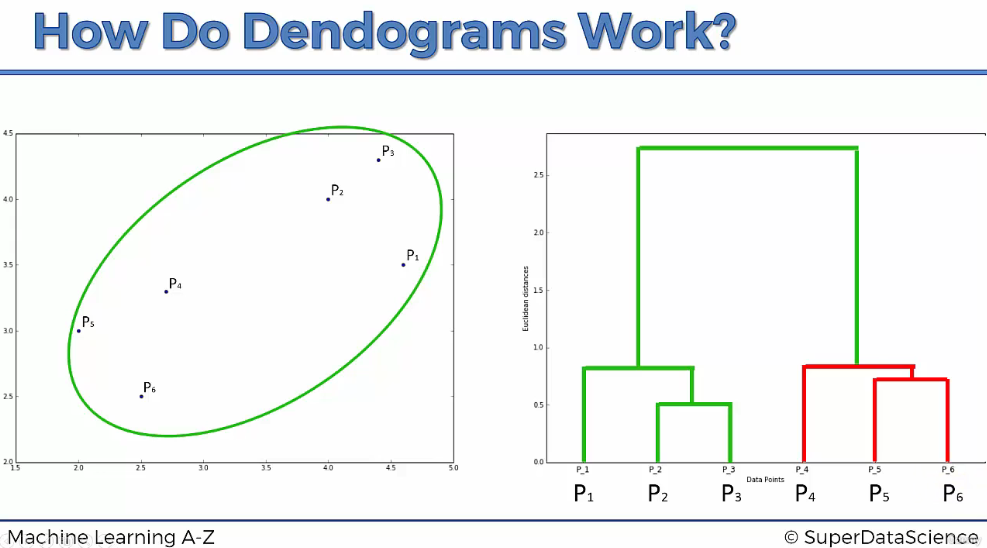


4. **Reading the Dendrogram**: The dendrogram provides a "memory" of the clustering process. By looking at the diagram, you can see:
   - **Order of Clustering**: The sequence in which the clusters were combined.
   - **Distance Between Clusters**: The height of each horizontal line indicates how far apart the clusters were when they were merged. Lower lines show that the clusters were close, and higher lines indicate greater dissimilarity.
   
5. **Selecting the Right Number of Clusters**: One of the main purposes of the dendrogram is to help determine the appropriate number of clusters. By looking at the height of the lines, you can decide where to "cut" the dendrogram to form a certain number of clusters. For example, if you want to create three clusters, you can cut the dendrogram at a height that leaves three branches.



### Steps of Hierarchical Clustering Using Dendrograms:

- **Dissimilarity threshold:**
   By setting a threshold along the vertical axis of the dendrogram, which represents dissimilarity, we can control how many clusters are formed.
    - For instance, if we set the threshold at a certain height, we only merge clusters that are less dissimilar than this threshold. The threshold essentially cuts the dendrogram at a certain level to define the final clusters.


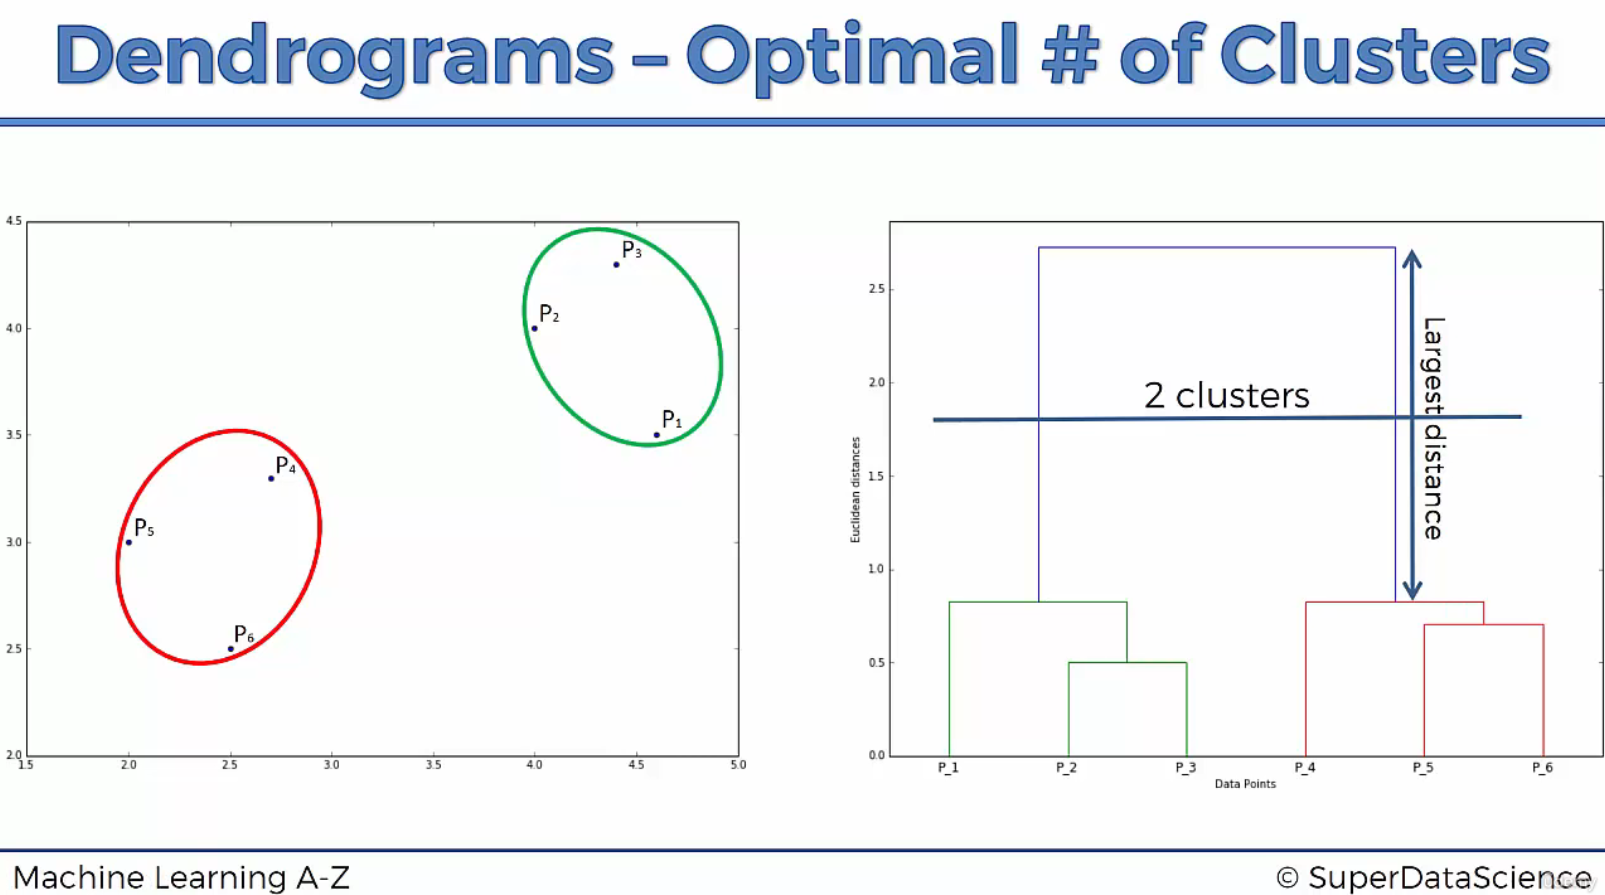


- **Optimal number of clusters:**
   The key challenge is determining the optimal number of clusters. One common method is to find the longest vertical line in the dendrogram that does not cross any horizontal lines. This largest gap between merges often suggests a natural point to "cut" the dendrogram. The number of vertical lines that the cut crosses determines the number of clusters. For example, if a threshold crosses three vertical lines, it suggests that three clusters are optimal.

### Practical Example:
- If we set the dissimilarity threshold high, we might see only two major clusters because many points are merged together at higher levels.
- If the threshold is very low, we could have many small clusters, perhaps even one cluster per point if no points are similar enough to merge.
  
By carefully adjusting the threshold and analyzing the dendrogram, we can identify the natural groupings within the data.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning A-Z/Part 4 - Clustering/2 Hierarchical Clustering/Mall_Customers.csv')

# Selecting the Annual Income (column index 3) and Spending Score (column index 4) features
# These columns will be used for clustering
X = dataset.iloc[:, [3, 4]].values

- `dataset.iloc[:, [3, 4]]`:
  - The first part before the comma (`:`) indicates the **row selection**. Using `:` by itself means "select all rows."
  - The second part after the comma (`[3, 4]`) indicates the **column selection**. `[3, 4]` selects the 4th and 5th columns (because indexing starts at 0).


The reason behind selecting only two features, "annual income" and "spending score," from the dataset for clustering: While all features (like gender, age, etc.) could be relevant, the decision to use just these two is made to simplify visualization.

Since Hierarchical clustering results can be visualized in a two-dimensional plot, it's easier to interpret the clusters with two features rather than trying to handle more dimensions, which would complicate the visualization.

Therefore, it is solely for didactic reasons.

## Using the dendrogram to find the optimal number of clusters

The method of minimum variance in hierarchical clustering aims to create clusters with low internal variance, meaning that the observation points within each cluster are similar.

This technique is implemented using the `ward` method in the linkage function. The Ward method minimizes the variance within clusters, making it a recommended approach for clustering. It can be further researched on Wikipedia, where it is explained in detail.

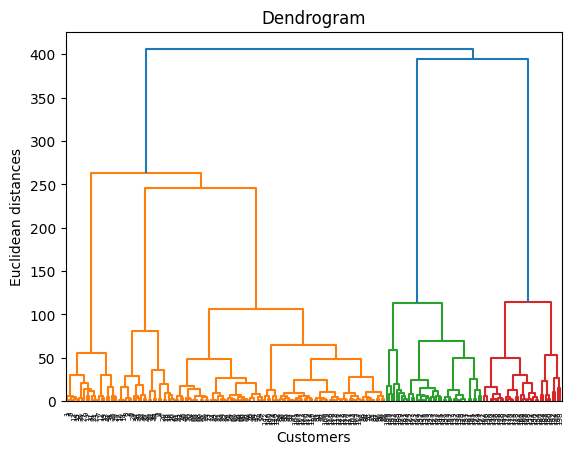

In [4]:
# Importing the hierarchy module from scipy, which includes functions for hierarchical clustering
import scipy.cluster.hierarchy as sch

# Creating the dendrogram using the linkage matrix; 'ward' method minimizes the variance within clusters
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

The X-axis of the dendrogram represents 200 customers, while the Y-axis shows the Euclidean distances between them.

Initially, the Euclidean distance is calculated between individual pairs of customers. When two customers are linked into a group, the group is then linked to other groups. The Euclidean distance between groups is computed by taking the square root of the sum of squared distances between customers within the groups. This process continues as groups grow larger, linking them at increasing distances.


The optimal number of clusters is 5, because this is the largest distance between horizontal bars:

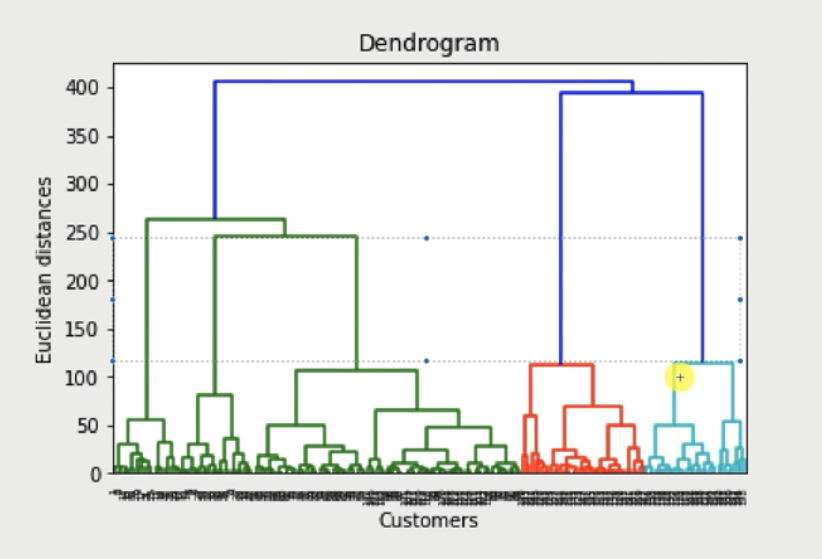

## Training the Hierarchical Clustering model on the dataset

In [5]:
# Import the AgglomerativeClustering class from sklearn
from sklearn.cluster import AgglomerativeClustering

# Create an instance of AgglomerativeClustering with 5 clusters, using Euclidean distance and Ward's method for linkage
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

# Fit the model to the data X and predict the clusters for each data point
y_hc = hc.fit_predict(X) # y_hc will contain the cluster labels for each observation in X

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [6]:
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


## Visualising the clusters

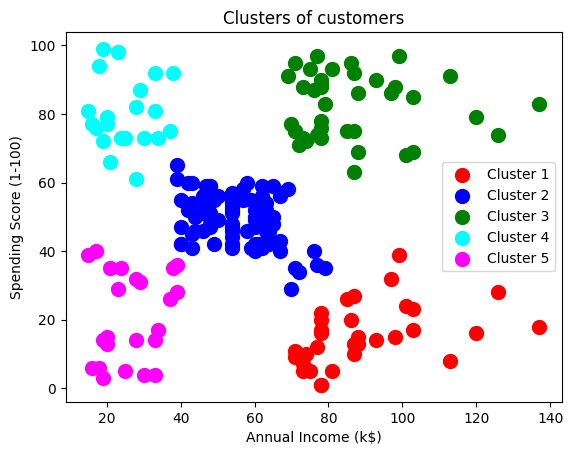

In [7]:
# Plot the data points belonging to Cluster 1 (identified by y_hc == 0).
# The X[..., 0] selects the Annual Income feature, and X[..., 1] selects the Spending Score.
# 's = 100' sets the size of the points, 'c = 'red'' sets the color, and 'label' assigns the label for Cluster 1.
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')

# Plot the data points belonging to Cluster 2 (identified by y_hc == 1).
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

# Plot the data points belonging to Cluster 3 (identified by y_hc == 2).
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

# Plot the data points belonging to Cluster 4 (identified by y_hc == 3).
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

# Plot the data points belonging to Cluster 5 (identified by y_hc == 4).
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Now let's discuss how clustering analysis of mall customers can be used to create targeted business strategies. Five clusters are identified based on annual income and spending behavior:

1. **Cluster 5 (Low income, low spending)**: These customers earn little and spend little. They likely won’t be targeted much as they aren't high spenders.
2. **Cluster 1 (High income, low spending)**: These customers have high incomes but don't spend much. The mall might want to target them with better advertising to encourage higher spending.
3. **Cluster 4 (Low income, high spending)**: These customers have low incomes but spend a lot. The mall could consider limiting their exposure to new deals to protect them from overspending.
4. **Cluster 3 (High income, high spending)**: These customers are high earners and high spenders, making them ideal targets for new deals and offers to boost sales further.
5. **Average cluster 2 (Moderate income and spending)**: This group earns and spends an average amount, and while they could be targeted, the mall might not invest too heavily in them.

The key takeaway is that clustering allows for personalized marketing strategies, helping businesses boost sales while also being socially responsible by protecting vulnerable customers.